In [7]:
using DifferentialEquations
using Plots
using Interpolations

In [2]:
function parameterized_lorenz!(du,u,p,t)
    
    x, y, z = u      #variables are part of vector array u     
    σ, ρ, β, = p     #coefficients are part of vector array p
    
    du[1] = dx = σ*(y-x)
    du[2] = dy = x*(ρ-z) - y
    du[3] = dz = x*y - β*z
    
end

parameterized_lorenz! (generic function with 1 method)

In [3]:
function plot_Lorenz_attractor(u0,tspan,p)
    #Feeding the inputs to the solver 
    prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)
    sol = solve(prob)
    return plot(sol, dpi=400, background_color=:transparent, vars = (1,2,3), legend=:false, grid=:false, xaxis=false,yaxis=false,zaxis=false)
end

plot_Lorenz_attractor (generic function with 1 method)

In [26]:
#Initial conditions. x=1.0, y=0.0, z=0.0
u0 = [14.0, 8.0, 3.0]
#Timespan of the simulation. 100 in this case. 
tspan = (0.0, 50.0)
#Coefficients of the functions. 
p = [13.0, 23.0, 4/3]

3-element Vector{Float64}:
 13.0
 23.0
  1.3333333333333333

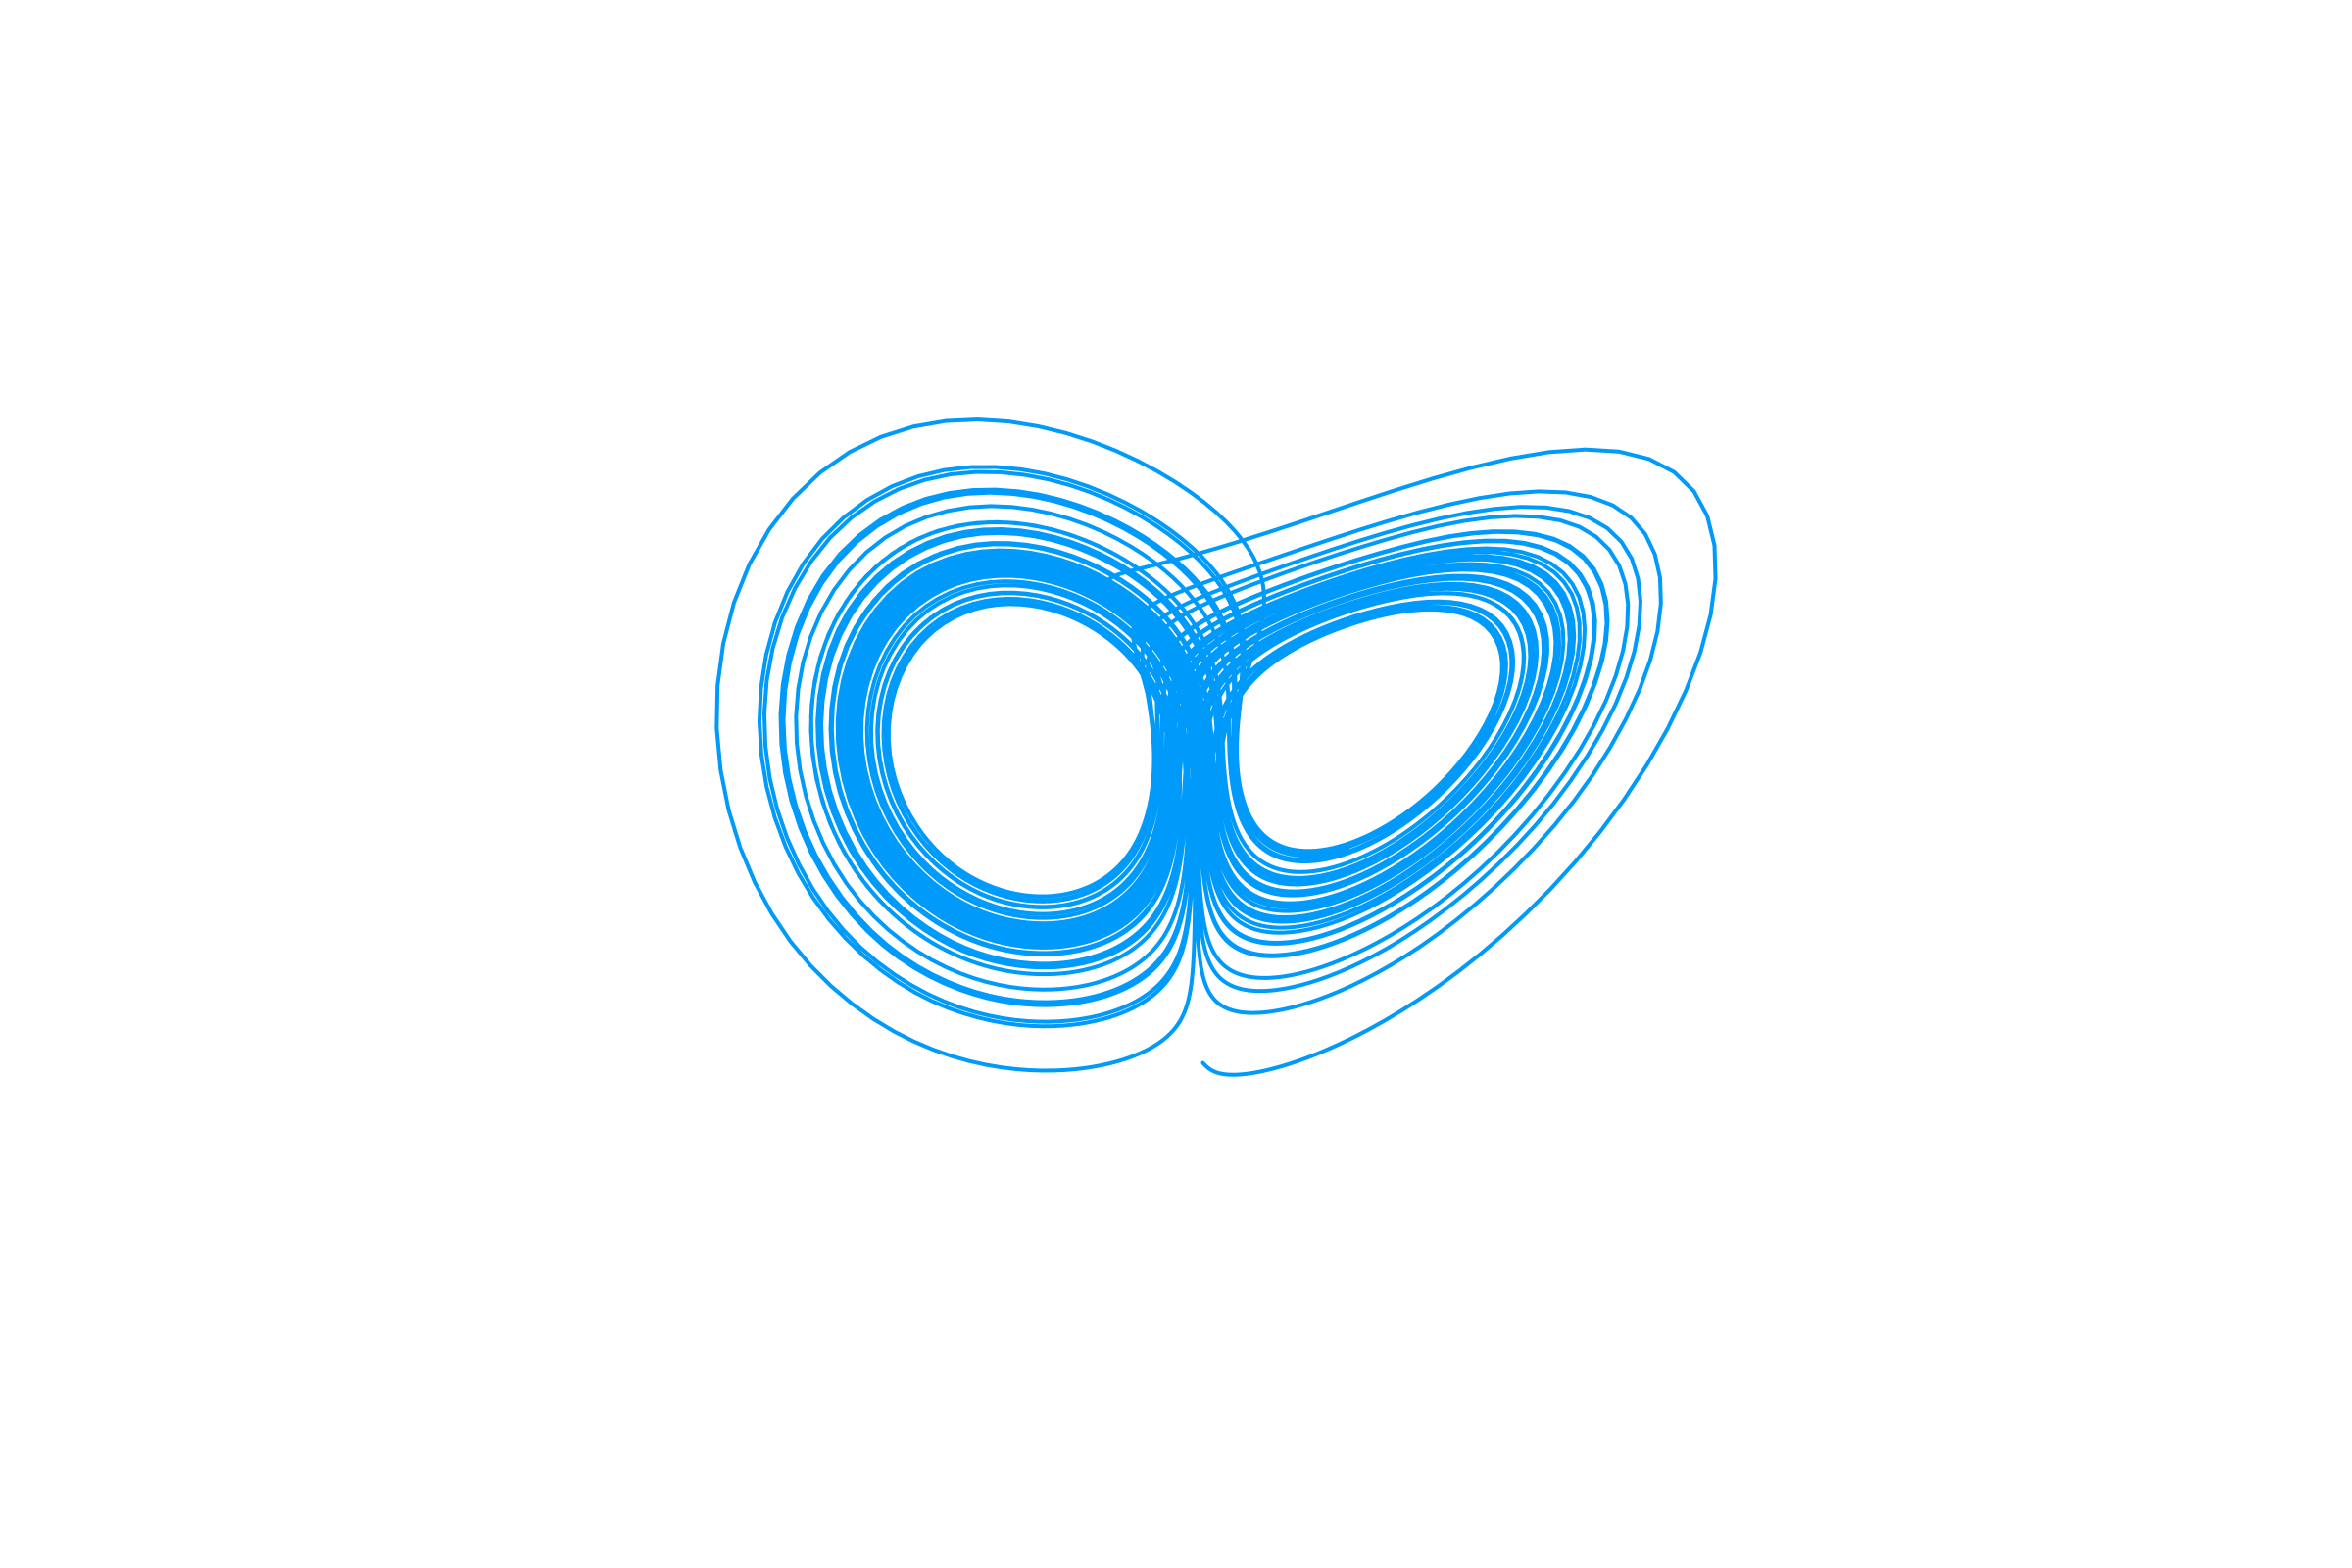

In [31]:
# p1 = plot_Lorenz_attractor([14,8,3],tspan,[13,23,4/3])
p2 = plot_Lorenz_attractor([25/365,6/12,97/17],tspan,[12,22,3/3])
# p3 = plot_Lorenz_attractor([22,4,3],tspan,[13,23,4/3])
# p4 = plot_Lorenz_attractor([4,6,96],tspan,[13,23,4/3])
# plot(p1,p2,p3,p4,layout=(2,2))
# png(p1,"plot2.png")

[ Info: Saved animation to /home/can/Lorenz Attractor/tmp.gif


Plots.AnimatedGif("/home/can/Lorenz Attractor/tmp.gif")
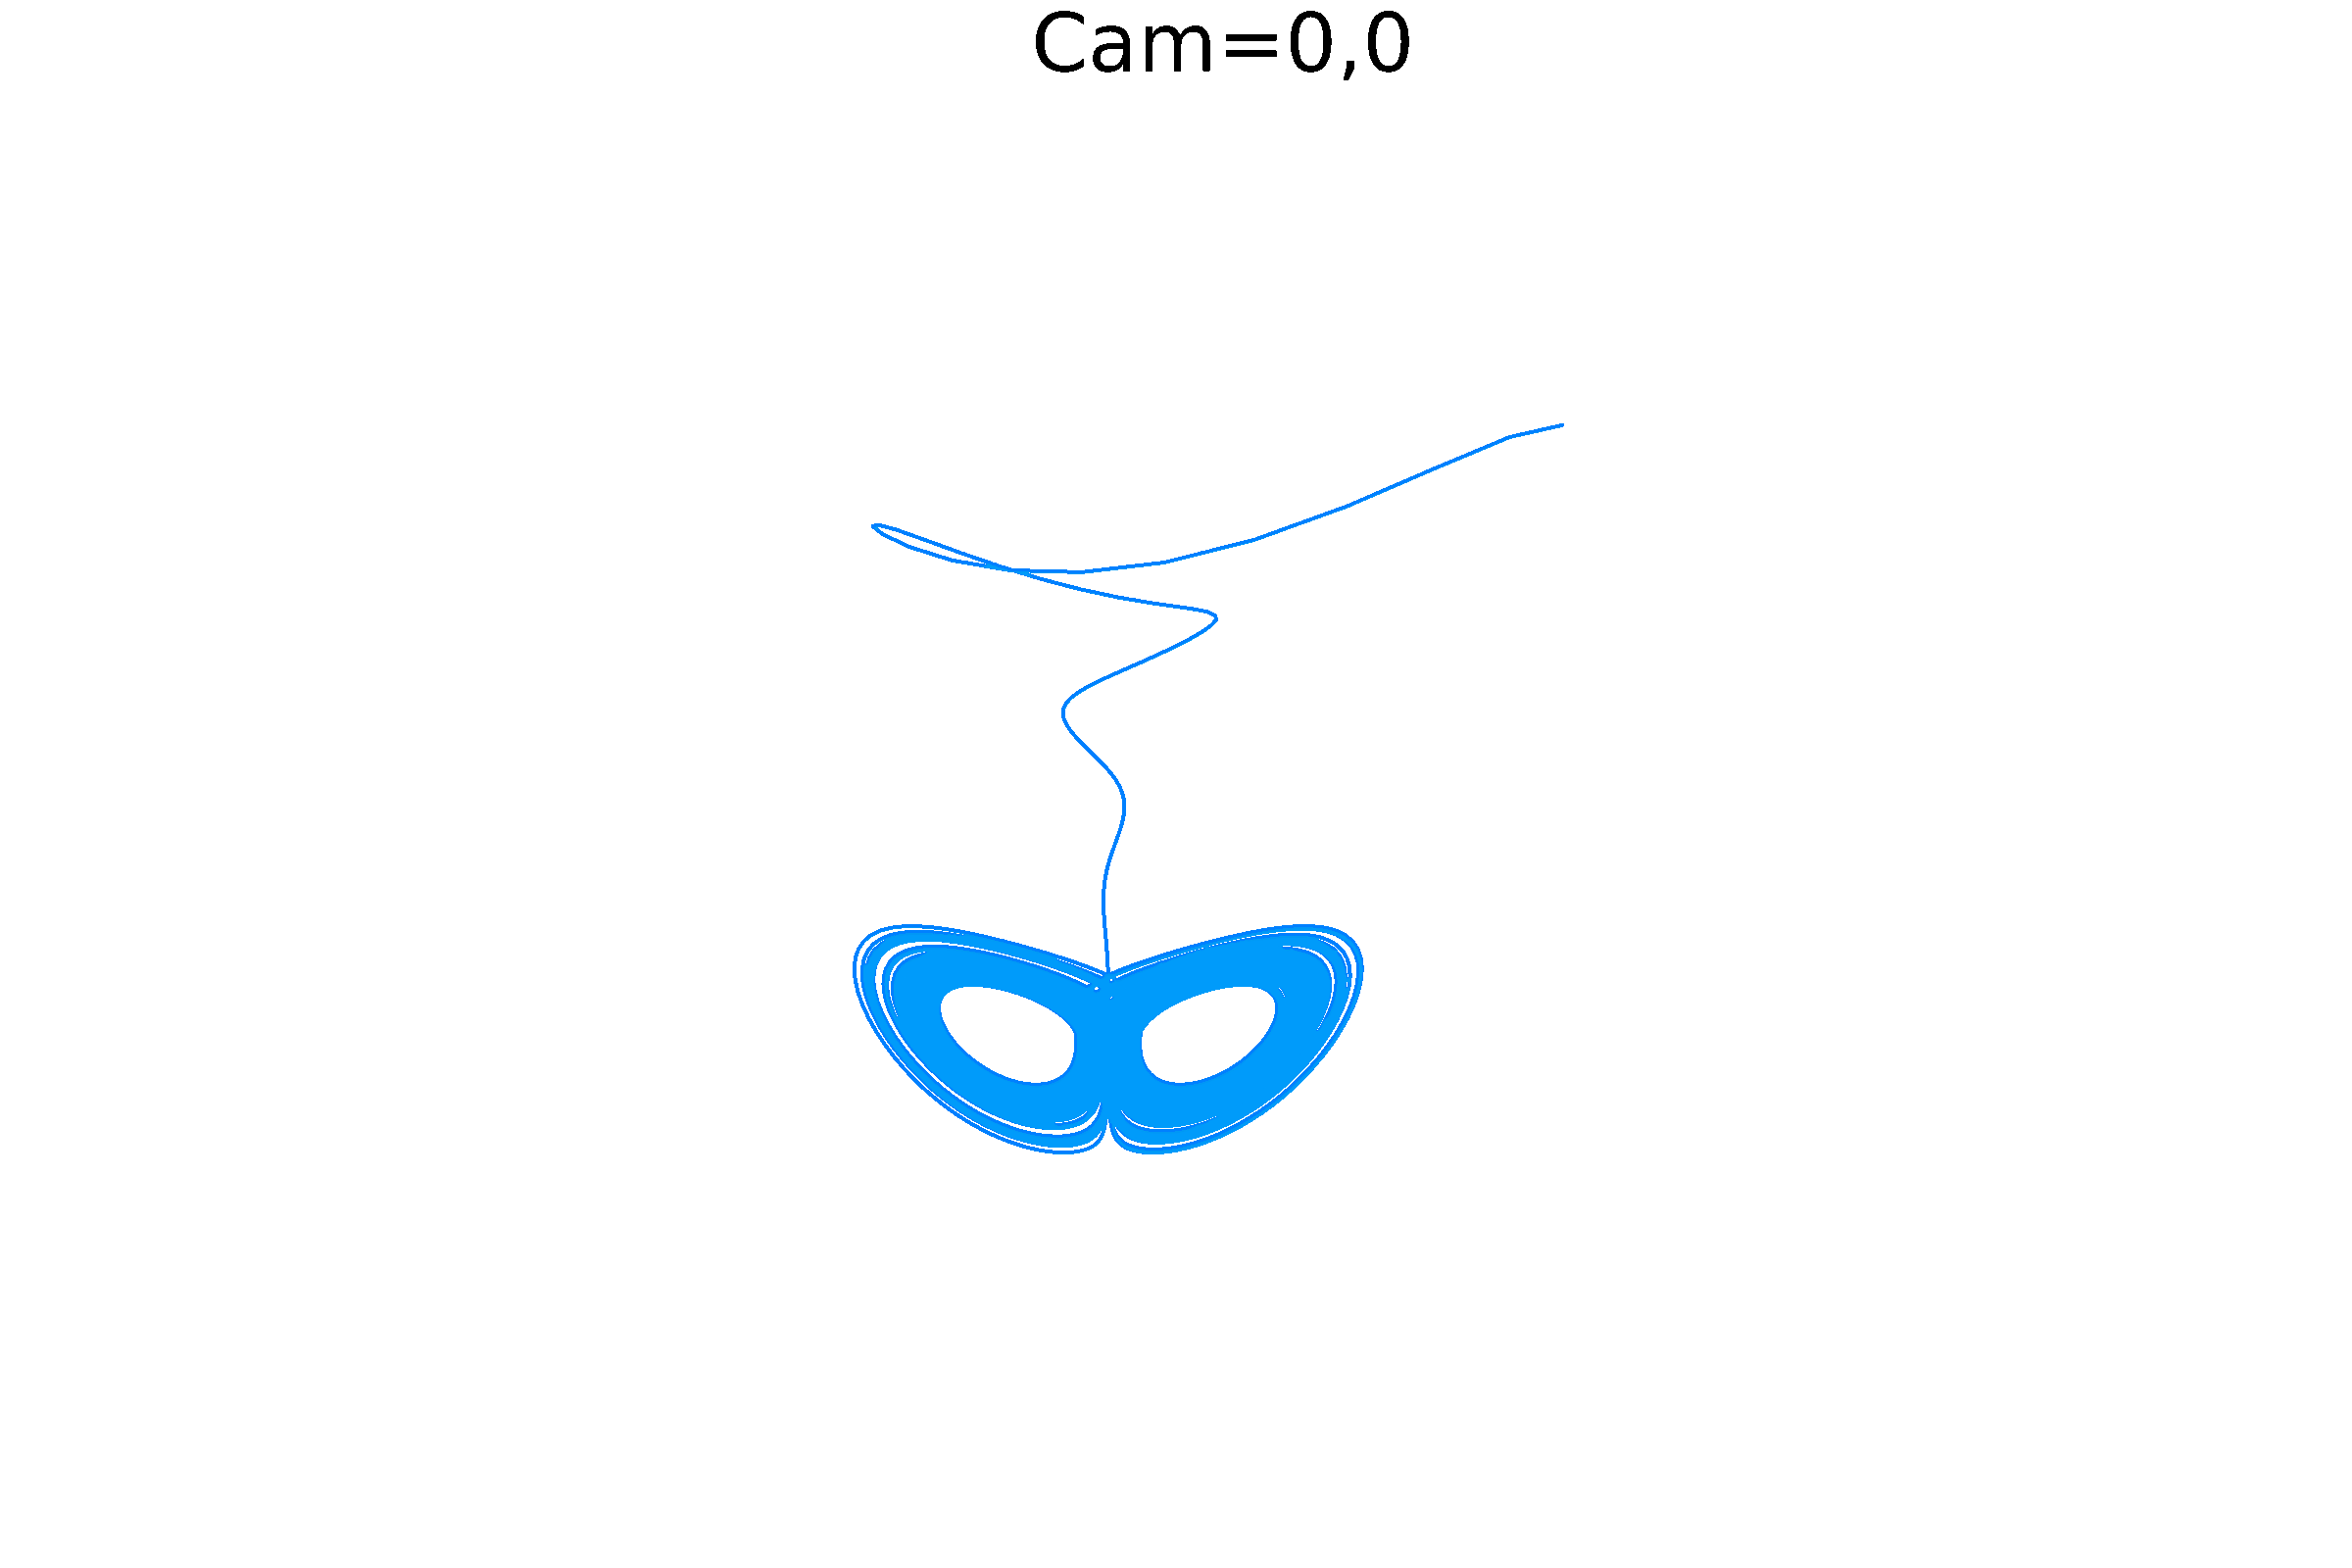

In [28]:
#Initial conditions. x=1.0, y=0.0, z=0.0
u0 = [25.0, 6.0, 97.0]
#Timespan of the simulation. 100 in this case. 
tspan = (0.0, 100.0)
#Coefficients of the functions. 
p = [13.0, 23.0, 4/3]
prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)
sol = solve(prob)
@gif for i in range(0, stop = 90, step = 1)
    p = plot(sol, dpi=400, background_color=:transparent,vars = (1,2,3), legend=:false, grid=:false, xaxis=false,yaxis=false,zaxis=false,camera=(i*2, i), title="Cam=$(i),$(i*2)")
end

[ Info: Saved animation to /home/can/Lorenz Attractor/tmp.gif


Plots.AnimatedGif("/home/can/Lorenz Attractor/tmp.gif")
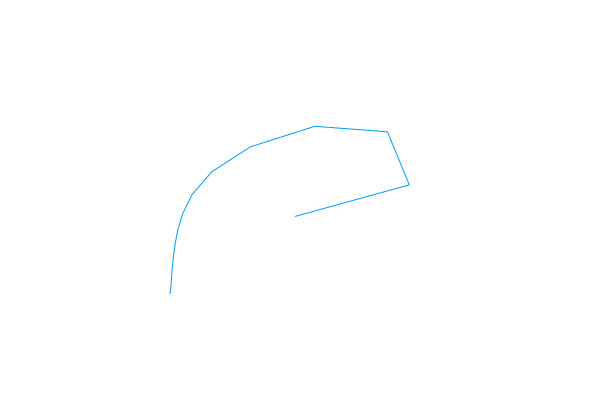

In [60]:
u0 = [1.0, 7.0, 0.0]#Timespan of the simulation. 100 in this case. 
tspan = (0.0, 100.0)#Coefficients of the functions. 
anim = @animate for i in 1:0.5:100
    p = [13.0, i, 7/3]#Feeding the inputs to the solver 
    prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)
    sol = solve(prob)
    plot1 = plot(sol, vars = (1,2,3), legend=:false, grid=:false, xaxis=false,yaxis=false,zaxis=false)
end
gif(anim,fps=5)

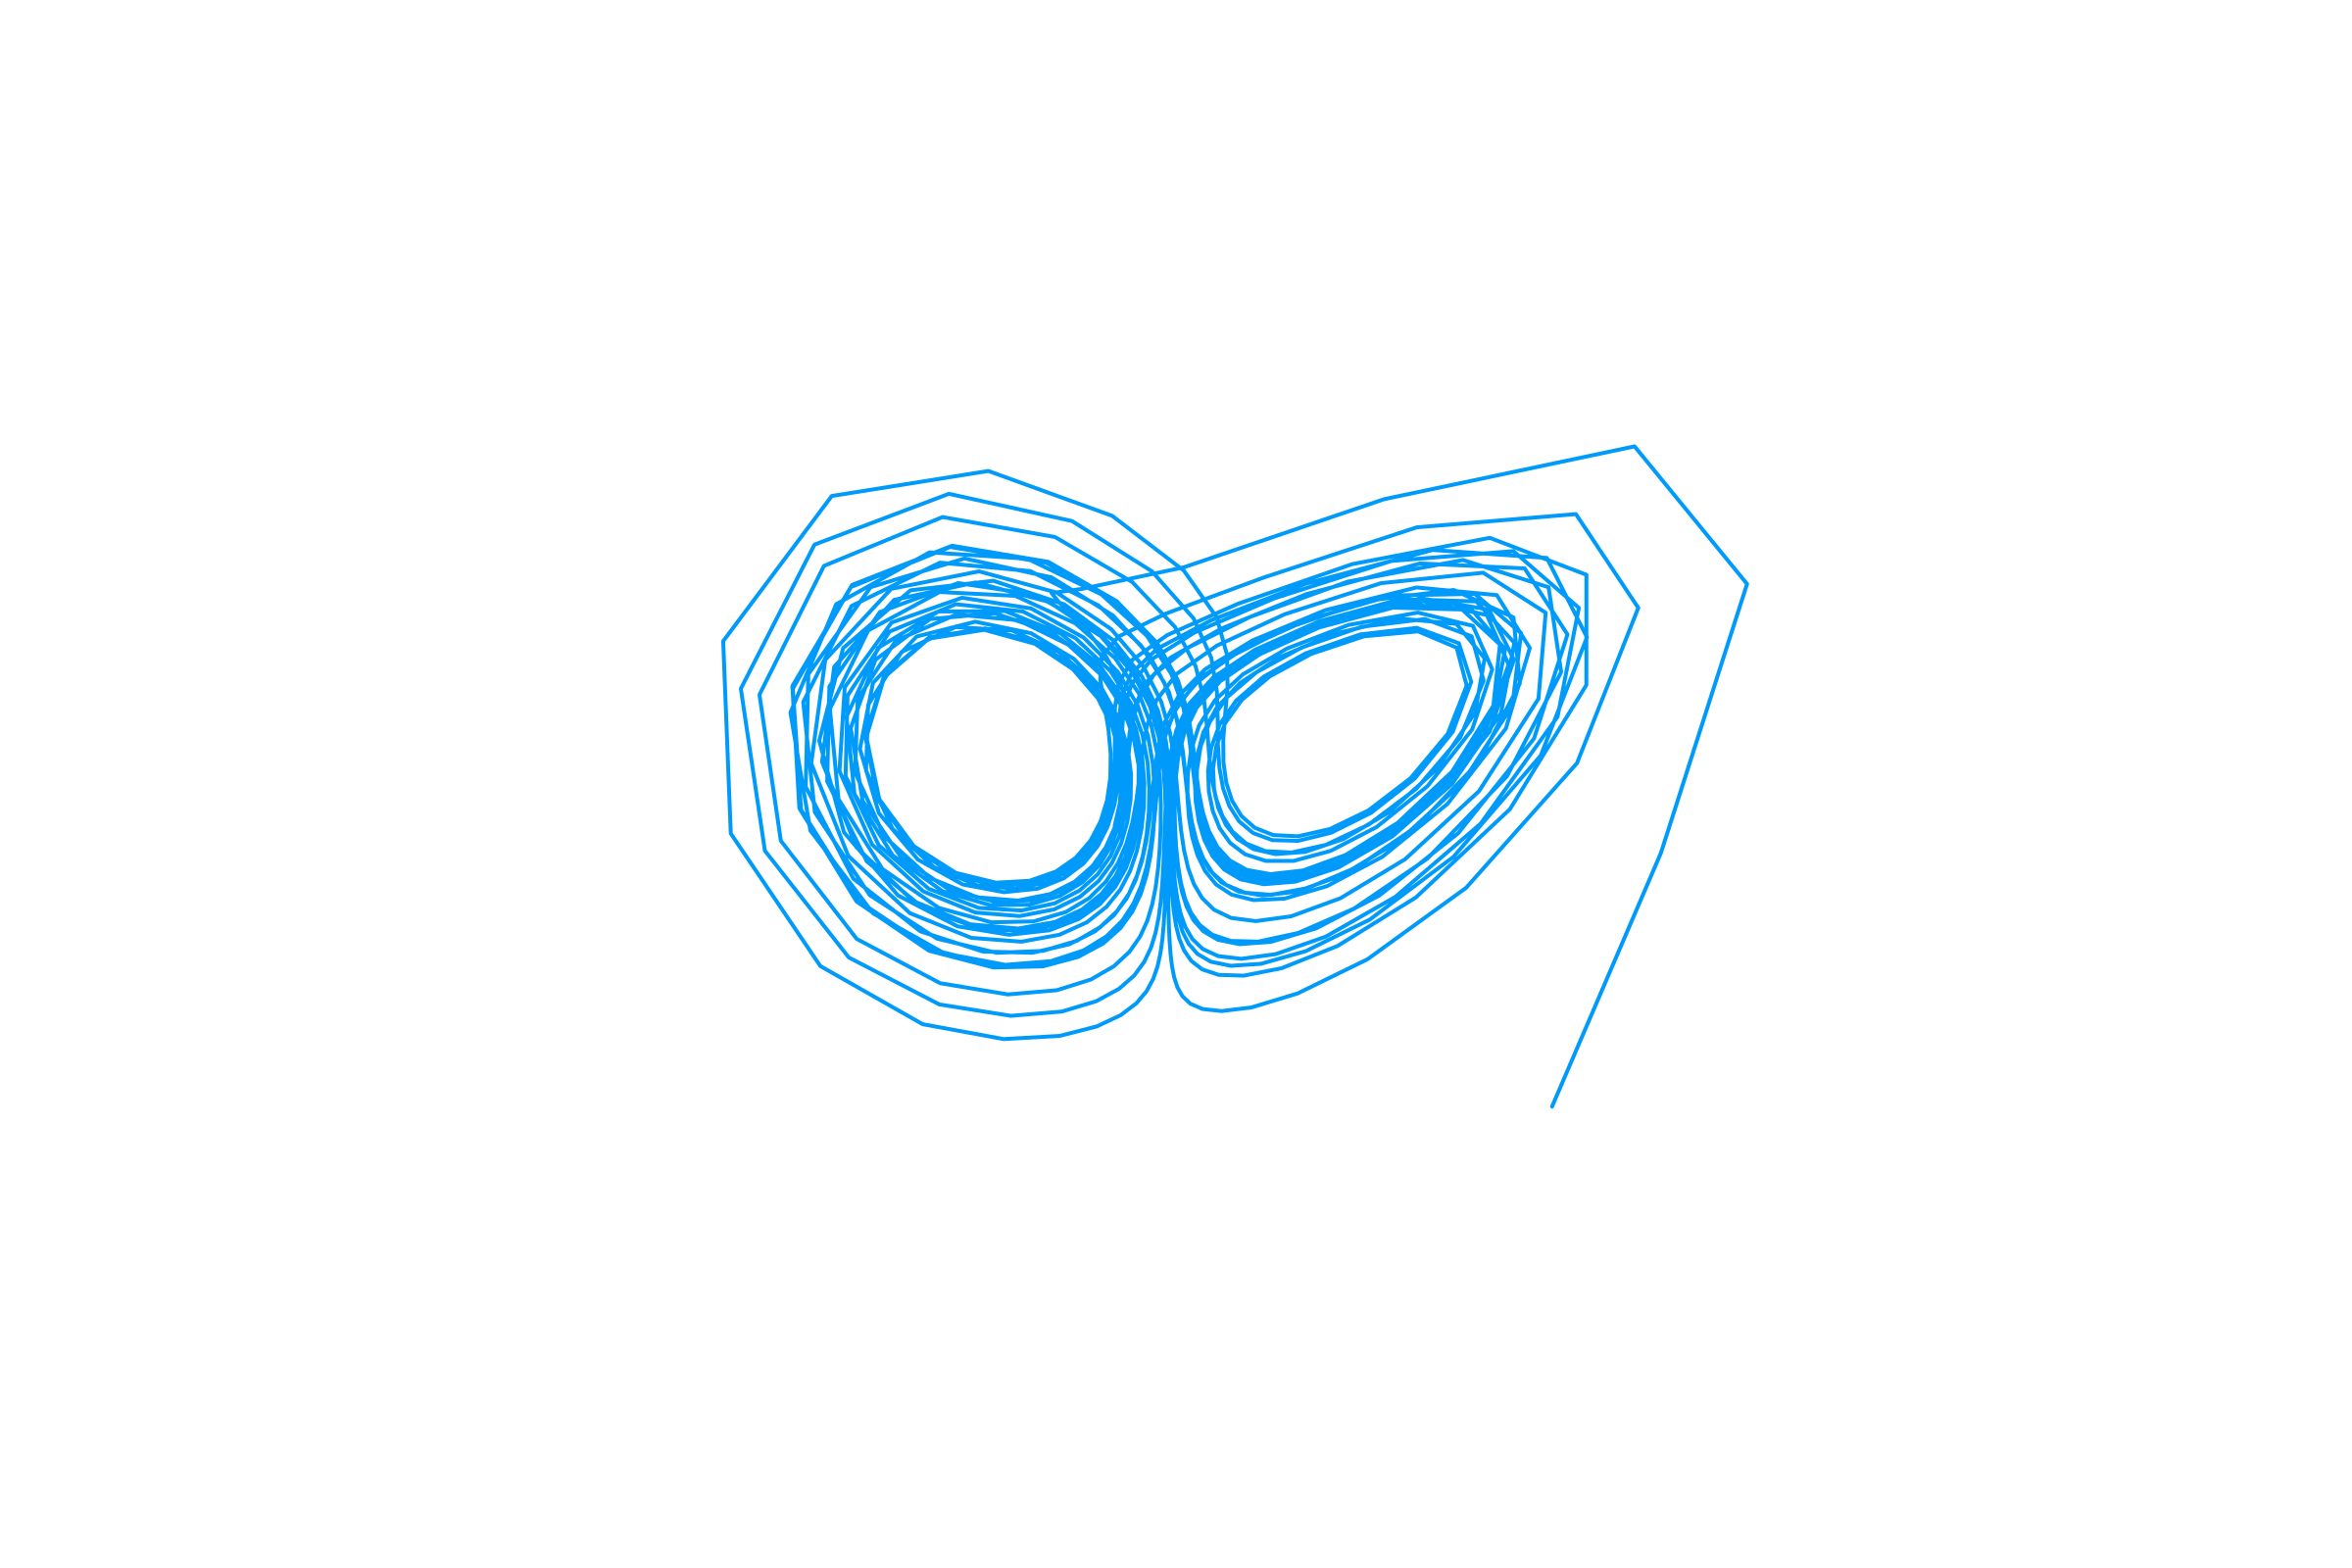

In [37]:
using DifferentialEquations
using Plots
using Interpolations

function parameterized_lorenz!(du,u,p,t)
    x, y, z = u      #variables are part of vector array u     
    σ, ρ, β, = p     #coefficients are part of vector array p
    
    du[1] = dx = σ*(y-x)
    du[2] = dy = x*(ρ-z) - y
    du[3] = dz = x*y - β*z
end

function plot_Lorenz_attractor_interpolated(u0,tspan,p; N=1000)
    prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)
    sol = solve(prob, Tsit5(), saveat=tspan[1] .+ (tspan[2]-tspan[1])*(0:N)/N)
    
    # Interpolating the solution for smoother plots
    x_interp = LinearInterpolation(sol.t, sol[1,:])
    y_interp = LinearInterpolation(sol.t, sol[2,:])
    z_interp = LinearInterpolation(sol.t, sol[3,:])
    
    t_interp = range(tspan[1], tspan[2], length=N)
    
    return plot(x_interp.(t_interp), y_interp.(t_interp), z_interp.(t_interp), 
                dpi=400, background_color=:transparent, legend=:false, grid=:false, 
                xaxis=false, yaxis=false, zaxis=false)
end

tspan = (0.0, 50.0)  # time span
p1 = plot_Lorenz_attractor_interpolated([14,8,3], tspan, [13,23,4/3])
# p2 = plot_Lorenz_attractor_interpolated([25,6,97], tspan, [12,22,3/3])
# p3 = plot_Lorenz_attractor_interpolated([22,4,3], tspan, [13,23,4/3])
# p4 = plot_Lorenz_attractor_interpolated([4,6,96], tspan, [13,23,4/3])
# plot(p1,p2,p3,p4, layout=(2,2))
